In [7]:
!pip install sktime numpy matplotlib scikit-learn


Training data shape: (5, 1, 50)
Test data shape: (5, 1, 50)
Transformed training data shape: (5, 9996)
Transformed test data shape: (5, 9996)
Test Accuracy: 0.4000


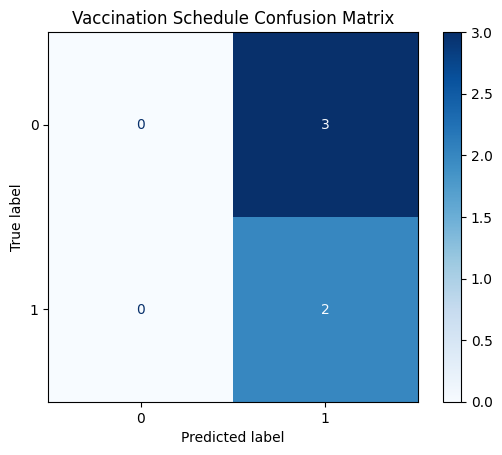

       Resource       Task  Start  End
0     Dr. Smith  Patient 1      9   10
1     Nurse Amy  Patient 1      9   10
2      Room 101  Patient 1      9   10
3   Dr. Johnson  Patient 2     10   11
4    Nurse John  Patient 2     10   11
5      Room 102  Patient 2     10   11
6     Dr. Smith  Patient 3     11   12
7     Nurse Amy  Patient 3     11   12
8      Room 101  Patient 3     11   12
9   Dr. Johnson  Patient 4     12   13
10   Nurse John  Patient 4     12   13
11     Room 102  Patient 4     12   13
12    Dr. Smith  Patient 5     13   14
13    Nurse Amy  Patient 5     13   14
14     Room 101  Patient 5     13   14


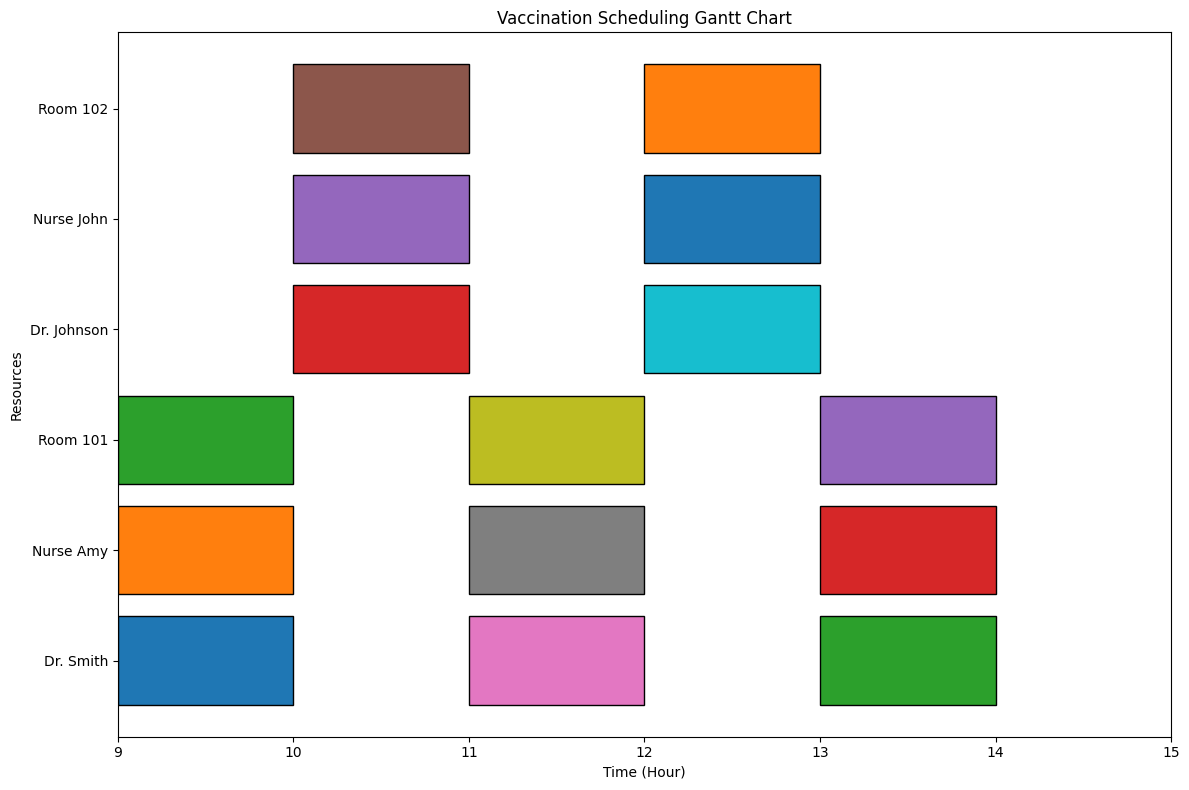


Explanation:
This model simulates a vaccination center where patient data (e.g., vital signs) is classified.
The extracted features from MiniRocket are used to train a RidgeClassifierCV model.
The confusion matrix shows the classification performance for patient scheduling.
Additionally, a Gantt chart visualizes the schedule of patients with assigned resources (doctors, nurses, and rooms).


In [12]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Simulate vaccination dataset
# Create a synthetic dataset for vaccination scheduling
patients = ["Patient 1", "Patient 2", "Patient 3", "Patient 4", "Patient 5"]
doctors = ["Dr. Smith", "Dr. Johnson"]
nurses = ["Nurse Amy", "Nurse John"]
rooms = ["Room 101", "Room 102"]

# Generate synthetic time-series data for patients (e.g., vital signs)
def generate_patient_data(num_patients, num_features, length):
    return np.random.rand(num_patients, 1, length), np.random.randint(0, 2, size=num_patients)

X_train, y_train = generate_patient_data(len(patients), 1, 50)  # 50 time points
X_test, y_test = generate_patient_data(len(patients), 1, 50)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Step 2: Apply MiniRocket for feature extraction
minirocket = MiniRocket(random_state=42)
minirocket.fit(X_train)
X_train_transform = minirocket.transform(X_train)
X_test_transform = minirocket.transform(X_test)

print(f"Transformed training data shape: {X_train_transform.shape}")
print(f"Transformed test data shape: {X_test_transform.shape}")

# Step 3: Train RidgeClassifierCV
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(X_train_transform, y_train)

# Step 4: Predict and evaluate
y_pred = classifier.predict(X_test_transform)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")

# Step 5: Output confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Vaccination Schedule Confusion Matrix")
plt.show()

# Step 6: Generate Gantt Chart for Scheduling
schedule_data = []
start_time = 9  # Start scheduling at 9:00 AM
for i, patient in enumerate(patients):
    doctor = doctors[i % len(doctors)]
    nurse = nurses[i % len(nurses)]
    room = rooms[i % len(rooms)]
    start = start_time + i  # Each patient gets a 1-hour slot
    end = start + 1
    schedule_data.append({
        "Resource": doctor,
        "Task": patient,
        "Start": start,
        "End": end
    })
    schedule_data.append({
        "Resource": nurse,
        "Task": patient,
        "Start": start,
        "End": end
    })
    schedule_data.append({
        "Resource": room,
        "Task": patient,
        "Start": start,
        "End": end
    })

# Convert to DataFrame for visualization
schedule_df = pd.DataFrame(schedule_data)
print(schedule_df)

# Plot Gantt Chart with horizontal bars
plt.figure(figsize=(12, 8))
for i, row in schedule_df.iterrows():
    plt.barh(row['Resource'], row['End'] - row['Start'], left=row['Start'], edgecolor='black')

plt.xlabel("Time (Hour)")
plt.ylabel("Resources")
plt.title("Vaccination Scheduling Gantt Chart")
plt.xticks(range(start_time, start_time + len(patients) + 2))
plt.tight_layout()
plt.show()

# Step 7: Explain Results
print("\nExplanation:")
print("This model simulates a vaccination center where patient data (e.g., vital signs) is classified.")
print("The extracted features from MiniRocket are used to train a RidgeClassifierCV model.")
print("The confusion matrix shows the classification performance for patient scheduling.")
print("Additionally, a Gantt chart visualizes the schedule of patients with assigned resources (doctors, nurses, and rooms).")
